In [1]:
import re
import os
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True, linewidth=100000)
plt.rcParams.update({'font.size': 20})

def re_int(string_sub, string_search):
    return int(re.sub(string_sub, '', re.search(r'%s\d+' % (string_sub), string_search).group()))

def re_float(string_sub, string_search):
    return float(re.sub(string_sub, '', re.search(r'%s[-]?\d+[.]\d+' % (string_sub), string_search).group()))

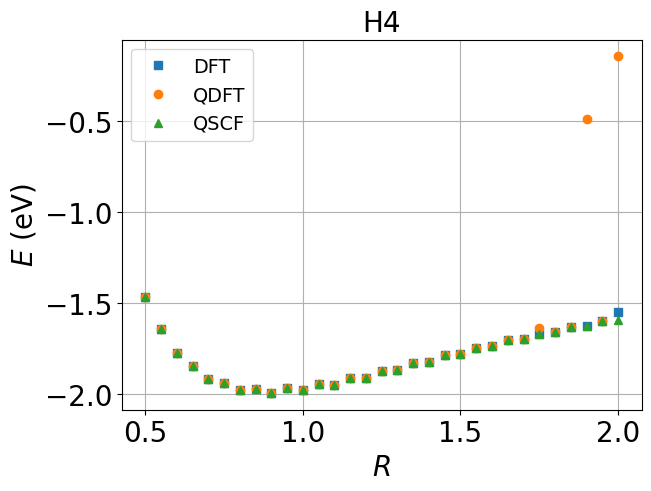

In [50]:
def show_E_R(dir_output, system='H4', method=['dft', 'qdft', 'qscf']):
    marker = ['s', 'o', '^']
    linestyle=['none', 'none', 'none']

    data = []
    for i, m in enumerate(method):
        data_i = []
        for fn in [fn for fn in os.listdir(dir_output) if re.match(system, fn)]:
            R = re_float('R', fn)
            with open(f'{dir_output}/{fn}/{m}.etot', 'r') as f: E = float(f.read())
            data_i.append([R, E])
        data_i = np.array(data_i)
        data.append(data_i[data_i[:, 0].argsort()])

    fig, ax = plt.subplots(constrained_layout=True)
    for d, m, mk, ls in zip(data, method, marker, linestyle):
        ax.plot(d[:, 0], d[:, 1], marker=mk, linestyle=ls, label=f'{m.upper()}')
    ax.set_xlabel(r'$R$')
    ax.set_ylabel(r'$E$ (eV)')
    ax.set_title(re.sub('_', ' ', f'{system}'), fontsize='medium')
    ax.legend(fontsize='x-small')
    ax.grid(True)
    plt.show()
    
show_E_R('output/')